# Problema 1: Clasificación de los datos en tormentas

Primeramente, se cargan las librerías necesarias

In [6]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from funciones_aux import load_n_combine_df
from funciones_aux import load_n_combine_mod_df
import tqdm 

#Escalado:
from sklearn.preprocessing import StandardScaler

#Modelos:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

#Metricas:
from sklearn.metrics import accuracy_score, confusion_matrix

#Stacking:
from sklearn.ensemble import StackingClassifier

## Ejemplo de Algoritmo Clasificatorio:

Ahora se seleccionan los splits de datos para entrenamiento, validación y test.

In [12]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(date = '2019-06-01',features_to_keep=np.arange(0,36,1),class_labels=True)

In [6]:
X_train

array([[-61.31      , -59.45      , -55.3       , ...,   3.91587405,
          7.44626141,  26.92510509],
       [-61.9       , -59.13      , -55.37      , ...,   4.01784424,
          7.64016365,  35.72445526],
       [-61.16      , -58.93      , -55.35      , ...,   4.12246977,
          7.64016365,  32.23354602],
       ...,
       [-70.25      , -66.83      , -61.19      , ...,   2.34175288,
         20.29313753,  58.2222365 ],
       [-69.97      , -66.46      , -61.17      , ...,   2.28232076,
         19.77811128,  71.51612002],
       [-69.73      , -66.3237    , -61.297     , ...,   2.16794328,
         18.78694012,  64.52773399]], shape=(446307, 36))

Se procede a revisar la dimensión de los conjuntos de datos

In [7]:
print('X_train, y_train shapes: {},{}'.format(X_train.shape,y_train.shape))
print('X_val, y_val shapes: {},{}'.format(X_validate.shape,y_validate.shape))
print('X_test, y_test shapes: {},{}'.format(X_test.shape,y_test.shape))

X_train, y_train shapes: (446307, 36),(446307,)
X_val, y_val shapes: (82871, 36),(82871,)
X_test, y_test shapes: (89716, 36),(89716,)


Se escalan los datos:

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

Se crea el modelo

In [9]:
model = LogisticRegression(max_iter=300)

In [10]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [11]:
pred = model.predict(X_validate)

In [13]:
accuracy_score(y_validate,pred)

0.900954495541263

Como se observa, se ha obtenido una precisión de predicción del 80,8% en comparación con el 81% original

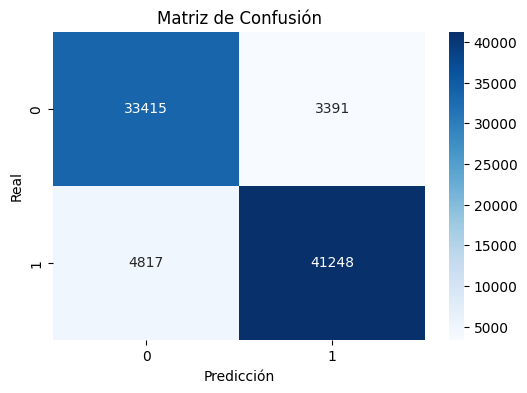

In [14]:
conf_m = confusion_matrix(y_validate,pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

## Realización de Múltiples Modelos

Se generan múltiples modelos de manera simultánea, para ello se realiza una lista de los modelos usados

In [8]:
model_list = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),LinearSVC(dual=False),xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')]


Se entrenan los modelos:

In [14]:
for model in tqdm.tqdm(model_list):
    model.fit(X_train,y_train)

  0%|          | 0/7 [00:00<?, ?it/s]C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 86%|████████▌ | 6/7 [08:02<01:41, 101.51s/it]C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:14:06] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
100%|██████████| 7/7 [08:04<00:00, 69.24s/it] 


In [15]:
for idx,model in enumerate(model_list):
    #predicciones 
    yhat = model.predict(X_validate)
    
    #metrica de error
    accuracy = accuracy_score(y_validate,yhat)
    
    print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,0)))

LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 84.0%
DecisionTreeClassifier() accuracy: 86.0%
RandomForestClassifier() accuracy: 90.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) accur

Se observa que los modelos predeterminados de la libreria ya consiguen una alta precisión en este dataset

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21576\2752576194.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="Blues_d")


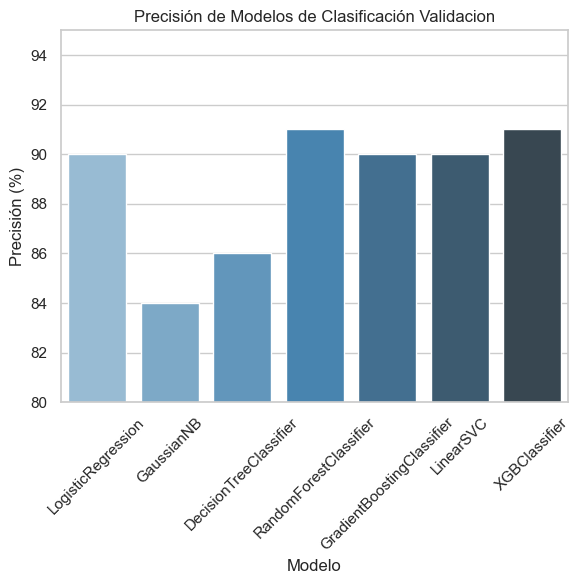

In [27]:
# Datos
modelos = [
    "LogisticRegression", 
    "GaussianNB", 
    "DecisionTreeClassifier", 
    "RandomForestClassifier", 
    "GradientBoostingClassifier", 
    "LinearSVC", 
    "XGBClassifier"
]
accuracies = [90.0, 84.0, 86.0, 91.0, 90.0, 90.0, 91.0]

# Crear DataFrame
df = pd.DataFrame({
    "Modelo": modelos,
    "Precisión (%)": accuracies
})

# Crear gráfica de barras
plt.figure(figsize=(6, 6))
sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="Blues_d")
plt.title("Precisión de Modelos de Clasificación Validacion")
plt.ylim(80, 95)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Para el subconjuncto de test:

In [17]:
for idx,model in enumerate(model_list):
    #predicciones 
    yhat = model.predict(X_test)
    
    #metrica de error
    accuracy = accuracy_score(y_test,yhat)
    
    print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,0)))

LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 85.0%
DecisionTreeClassifier() accuracy: 86.0%
RandomForestClassifier() accuracy: 92.0%
GradientBoostingClassifier() accuracy: 92.0%
LinearSVC(dual=False) accuracy: 91.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) accur

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21576\2732519016.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="Blues_d")


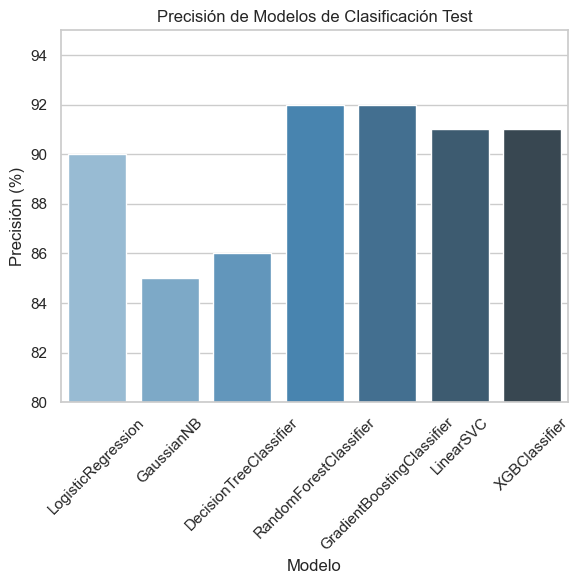

In [25]:
# Datos
modelos = [
    "LogisticRegression", 
    "GaussianNB", 
    "DecisionTreeClassifier", 
    "RandomForestClassifier", 
    "GradientBoostingClassifier", 
    "LinearSVC", 
    "XGBClassifier"
]
accuracies = [90.0, 85.0, 86.0, 92.0, 92.0, 91.0, 91.0]

# Crear DataFrame
df = pd.DataFrame({
    "Modelo": modelos,
    "Precisión (%)": accuracies
})

# Crear gráfica de barras
plt.figure(figsize=(6, 6))
sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="Blues_d")
plt.title("Precisión de Modelos de Clasificación Test")
plt.ylim(80, 95)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Como en el paper original estas métricas no vienen, de ahora en adelante solo se realizará del validación a falta de comparativa.

## Optimización 

Se elaborará una lista de fechas

In [20]:
lista_fechas = ['2017-06-01','2017-12-01','2018-04-01','2018-05-01','2018-06-01','2018-12-01','2019-02-01','2019-04-01','2019-06-01']

Estas fechas han sido implementadas directamente en la función `load_n_combine_mod_df`. A continuación, se obtienen las listas de datos de entrenamiento, validación y prueba correspondientes a cada una de ellas

In [21]:
(list_X_train,list_y_train),(list_X_validate,list_y_validate),(list_X_test,list_y_test) = load_n_combine_mod_df(features_to_keep=np.arange(0,36,1),class_labels=True)

Se analizará la cantidad de datos presentes en cada división temporal

In [22]:
for i in range(len(list_X_train)):
    X_train = list_X_train[i]
    y_train = list_y_train[i]
    X_validate = list_X_validate[i]
    y_validate = list_y_validate[i]
    X_test = list_X_test[i]
    y_test = list_y_test[i]

    print('----------------------------------')
    print(lista_fechas[i])

    print('X_train, y_train shapes: {},{}'.format(X_train.shape,y_train.shape))
    print('X_val, y_val shapes: {},{}'.format(X_validate.shape,y_validate.shape))
    print('X_test, y_test shapes: {},{}'.format(X_test.shape,y_test.shape))

----------------------------------
2017-06-01
X_train, y_train shapes: (0, 36),(0,)
X_val, y_val shapes: (204492, 36),(204492,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2017-12-01
X_train, y_train shapes: (0, 36),(0,)
X_val, y_val shapes: (204492, 36),(204492,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-04-01
X_train, y_train shapes: (10437, 36),(10437,)
X_val, y_val shapes: (204492, 36),(204492,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-05-01
X_train, y_train shapes: (33290, 36),(33290,)
X_val, y_val shapes: (204492, 36),(204492,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-06-01
X_train, y_train shapes: (51596, 36),(51596,)
X_val, y_val shapes: (201755, 36),(201755,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-12-01
X_train, y_train shapes: (278885, 36),(278885,)
X_val, y_val

Los primeros dos conjuntos de datos no son relevantes, por lo que se eliminan

In [23]:
list_X_train = list_X_train[2:]
list_X_validate = list_X_validate[2:]
list_X_test = list_X_test[2:]
list_y_train = list_y_train[2:]
list_y_validate = list_y_validate[2:]
list_y_test = list_y_test[2:]
lista_fechas = lista_fechas[2:]

In [24]:
for i in range(len(list_X_train)):
    X_train = list_X_train[i]
    y_train = list_y_train[i]
    X_validate = list_X_validate[i]
    y_validate = list_y_validate[i]
    X_test = list_X_test[i]
    y_test = list_y_test[i]
    print('----------------------------------')
    print(lista_fechas[i])

    print('X_train, y_train shapes: {},{}'.format(X_train.shape,y_train.shape))
    print('X_val, y_val shapes: {},{}'.format(X_validate.shape,y_validate.shape))
    print('X_test, y_test shapes: {},{}'.format(X_test.shape,y_test.shape))

----------------------------------
2018-04-01
X_train, y_train shapes: (10437, 36),(10437,)
X_val, y_val shapes: (204492, 36),(204492,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-05-01
X_train, y_train shapes: (33290, 36),(33290,)
X_val, y_val shapes: (204492, 36),(204492,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-06-01
X_train, y_train shapes: (51596, 36),(51596,)
X_val, y_val shapes: (201755, 36),(201755,)
X_test, y_test shapes: (224498, 36),(224498,)
----------------------------------
2018-12-01
X_train, y_train shapes: (278885, 36),(278885,)
X_val, y_val shapes: (94099, 36),(94099,)
X_test, y_test shapes: (104796, 36),(104796,)
----------------------------------
2019-02-01
X_train, y_train shapes: (330529, 36),(330529,)
X_val, y_val shapes: (86546, 36),(86546,)
X_test, y_test shapes: (89716, 36),(89716,)
----------------------------------
2019-04-01
X_train, y_train shapes: (385504, 36),(385504,

A continuación, se evaluará la precisión de cada modelo con cada conjunto de datos

In [25]:
for i in range(len(list_X_train)):

    X_train = list_X_train[i]
    y_train = list_y_train[i]
    X_validate = list_X_validate[i]
    y_validate = list_y_validate[i]

    model_list = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),LinearSVC(dual=False),xgb.XGBClassifier(eval_metric='mlogloss')]

    print('----------------------------------')
    print(lista_fechas[i])

    for model in tqdm.tqdm(model_list):
        model.fit(X_train,y_train)

    for idx,model in enumerate(model_list):
    #Predicciones 
        yhat = model.predict(X_validate)
    
    #Metricas
        accuracy = accuracy_score(y_validate,yhat)
    
        print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,0)))

----------------------------------
2018-04-01


  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [00:09<00:00,  1.35s/it]


LogisticRegression() accuracy: 61.0%
GaussianNB() accuracy: 71.0%
DecisionTreeClassifier() accuracy: 62.0%
RandomForestClassifier() accuracy: 58.0%
GradientBoostingClassifier() accuracy: 60.0%
LinearSVC(dual=False) accuracy: 61.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [00:27<00:00,  3.86s/it]


LogisticRegression() accuracy: 84.0%
GaussianNB() accuracy: 77.0%
DecisionTreeClassifier() accuracy: 78.0%
RandomForestClassifier() accuracy: 88.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 85.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [00:41<00:00,  5.95s/it]


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 82.0%
DecisionTreeClassifier() accuracy: 82.0%
RandomForestClassifier() accuracy: 90.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 89.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [04:03<00:00, 34.75s/it]


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 85.0%
DecisionTreeClassifier() accuracy: 85.0%
RandomForestClassifier() accuracy: 91.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [04:46<00:00, 40.90s/it]


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 85.0%
DecisionTreeClassifier() accuracy: 86.0%
RandomForestClassifier() accuracy: 90.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [05:28<00:00, 46.91s/it]


LogisticRegression() accuracy: 89.0%
GaussianNB() accuracy: 86.0%
DecisionTreeClassifier() accuracy: 85.0%
RandomForestClassifier() accuracy: 90.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [06:21<00:00, 54.43s/it] 


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 84.0%
DecisionTreeClassifier() accuracy: 86.0%
RandomForestClassifier() accuracy: 91.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

Como se observa en los resultados anteriores, es posible reducir la cantidad de datos de entrenamiento originales en 400,000 entradas sin una disminución significativa en la calidad del modelo. Esto permite obtener resultados satisfactorios mientras se reduce considerablemente el costo computacional

Por lo tanto, la fecha óptima para realizar el corte de los datos de entrenamiento es '2018-06-01'.

## Hiperparametros:

Se procede a cargar las librerias:

In [28]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from lwoku import RANDOM_STATE, N_JOBS, VERBOSE, get_prediction
from grid_search_utils import plot_grid_search, table_grid_search

import pickle

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting numpy==1.17.2

Downloading numpy-1.17.2.zip (6.5 MB)

Installing build dependencies: started

Installing build dependencies: finished with status 'done'

Getting requirements to build wheel: started

Getting requirements to build wheel: finished with status 'done'

Preparing metadata (pyproject.toml): started

Preparing metadata (pyproject.toml): finished with status 'error'

error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      Running from numpy source directory.
      <string>:418: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      Traceback (most recent call last):
        File "c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
        File "c:\Users\EQUIPO\Documents\kenny-26-4-2025\.venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 175, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
        File "C:\Users\EQUIPO\AppData\Local\Temp\pip-build-env-17lviqkk\overlay\Lib\site-packages\setuptools\build_meta.py", line 374, in prepare_metadata_for_build_wheel
          self.run_setup()
        File "C:\Users\EQUIPO\AppData\Local\Temp\pip-build-env-17lviqkk\overlay\Lib\site-packages\setuptools\build_meta.py", line 512, in run_setup
          super().run_setup(setup_script=setup_script)
        File "C:\Users\EQUIPO\AppData\Local\Temp\pip-build-env-17lviqkk\overlay\Lib\site-packages\setuptools\build_meta.py", line 317, in run_setup
          exec(code, locals())
        File "<string>", line 443, in <module>
        File "<string>", line 422, in setup_package
        File "C:\Users\EQUIPO\AppData\Local\Temp\pip-install-rb0yz41o\numpy_73fa2e28420446d8977c557155404515\numpy\distutils\__init__.py", line 6, in <module>
          from . import ccompiler
        File "C:\Users\EQUIPO\AppData\Local\Temp\pip-install-rb0yz41o\numpy_73fa2e28420446d8977c557155404515\numpy\distutils\ccompiler.py", line 111, in <module>
          replace_method(CCompiler, 'find_executables', CCompiler_find_executables)
      NameError: name 'CCompiler' is not defined. Did you mean: 'ccompiler'?
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

> NumPy version: 2.2.5


Ahora se cargan los conjuntos de datos que se usarán, en este caso al realizar validación cruzada vamos a usar un split temporal algo más adelantado para evitar la perdida de eficiencia de los modelos.

In [29]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(date ='2018-09-01', features_to_keep=np.arange(0,36,1),class_labels=True)

Se entrenan los datos en este split para luego comparar su eficiencia:

In [31]:
model_list = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),LinearSVC(dual=False),xgb.XGBClassifier(eval_metric='mlogloss')]

for model in tqdm.tqdm(model_list):
    model.fit(X_train,y_train)

for idx,model in enumerate(model_list):
    #Predicciones 
    yhat = model.predict(X_validate)
    
    #Metricas
    accuracy = accuracy_score(y_validate,yhat)
    
    print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,0)))

100%|██████████| 7/7 [02:44<00:00, 23.51s/it]


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 82.0%
DecisionTreeClassifier() accuracy: 84.0%
RandomForestClassifier() accuracy: 90.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree

Una vez ya obtenidos estos datos, se procede a encontrar mejores hiperparametros para cada modelo de forma individual:

GaussianNB:

In [32]:
model = GaussianNB()

In [33]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(model, parameters, cv=5, verbose=VERBOSE, n_jobs=-1)
clf.fit(X_train, y_train)
plot_grid_search(clf)
table_grid_search(clf)

,mean_test_score,mean_fit_time,mean_score_time,param_var_smoothing
7,0.840622,0.709726,0.1324,1.000000e-09


DecisionTreeClassifier:

In [34]:
parameters = {
        'max_features': ['sqrt', 'log2'],
        'ccp_alpha': [0.1, 0.01, 0.001],
        'max_depth': [5, 6, 7, 8, 9],
        'criterion': ['gini', 'entropy']
    }

In [35]:
model = DecisionTreeClassifier()

In [36]:
clf = GridSearchCV(model, parameters, cv=5, verbose=VERBOSE, n_jobs=-1)
clf.fit(X_train, y_train)
plot_grid_search(clf)
table_grid_search(clf)

,mean_test_score,mean_fit_time,mean_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features
52,0.892357,0.863411,0.013599,0.001,entropy,6,sqrt


RadomForestClassifier:

In [37]:
model = RandomForestClassifier()

In [38]:
param = {
        'n_estimators': list(range(10, 101,5)),
        'criterion': ['gini', 'entropy'],
        'max_depth': list(range(4, 13)),
        'min_samples_split': list(range(2, 11)),
        'min_samples_leaf': list(range(1, 11)),
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }

In [39]:
clf = RandomizedSearchCV(model, param, cv=5, verbose=VERBOSE, n_jobs=-1, n_iter=100)
clf.fit(X_train, y_train)
plot_grid_search(clf)
table_grid_search(clf)

,mean_test_score,mean_fit_time,mean_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap
38,0.906568,36.545336,0.321066,95,8,2,sqrt,5,gini,True


GradientBoosting:

In [40]:
model = GradientBoostingClassifier()

In [41]:
param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

In [42]:
clf = RandomizedSearchCV(model, param, cv=5, verbose=VERBOSE, n_jobs=-1, n_iter=100)
clf.fit(X_train, y_train)
plot_grid_search(clf)
table_grid_search(clf)

,mean_test_score,mean_fit_time,mean_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_max_depth,param_learning_rate
29,0.909495,540.318723,0.369481,1.0,300,10,3,0.01
15,0.909495,555.090565,0.476698,1.0,300,5,3,0.01


LinearSVC:

In [43]:
model = LinearSVC()

In [44]:
param = {'C': [1, 10, 100, 1000]}

In [45]:
clf = GridSearchCV(model, param, cv=5, verbose=VERBOSE, n_jobs=-1)
clf.fit(X_train, y_train)
plot_grid_search(clf)
table_grid_search(clf)

,mean_test_score,mean_fit_time,mean_score_time,param_C
3,0.899851,29.999689,0.014658,1000


XGBoost:

In [46]:
model = xgb.XGBClassifier()

In [47]:
param = {
        'booster': ['gbtree', 'gblinear'],
        'learning_rate': [0.1],
        'max_depth': [7, 10, 15, 20],
        'min_child_weight': [10, 15, 20, 25],
        'colsample_bytree': [0.8, 0.9, 1],
        'n_estimators': [300, 400, 500, 600],
        "reg_alpha": [0.5, 0.2, 1],
        "reg_lambda": [2, 3, 5],
        "gamma": [1, 2, 3]
}
    

In [48]:
clf = RandomizedSearchCV(model, param, cv=5, verbose=VERBOSE, n_jobs=-1, n_iter=100)
clf.fit(X_train, y_train)
plot_grid_search(clf)
table_grid_search(clf)

,mean_test_score,mean_fit_time,mean_score_time,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,param_booster
87,0.904003,47.103702,0.081992,5,0.2,600,10,20,0.1,3,1.0,gblinear
25,0.904003,50.156058,0.070419,5,0.2,600,15,10,0.1,2,0.9,gblinear
14,0.904003,50.279026,0.075260,5,0.2,600,25,20,0.1,1,0.8,gblinear


Se realiza una comparación, primero se ve la precisión de los modelos normales:

In [11]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(date ='2018-09-01', features_to_keep=np.arange(0,36,1),class_labels=True)

In [22]:
model_list = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),LinearSVC(dual=False),xgb.XGBClassifier(eval_metric='mlogloss')]

for model in tqdm.tqdm(model_list):
    model.fit(X_train,y_train)

for idx,model in enumerate(model_list):
    #get predictions 
    yhat = model.predict(X_validate)
    
    #get metrics
    accuracy = accuracy_score(y_validate,yhat)
    
    print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,0)))

  0%|          | 0/7 [00:00<?, ?it/s]C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [03:19<00:00, 28.48s/it]


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 82.0%
DecisionTreeClassifier() accuracy: 84.0%
RandomForestClassifier() accuracy: 90.0%
GradientBoostingClassifier() accuracy: 90.0%
LinearSVC(dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) accur

Ahora con los mejores hiperparametros encontrados:

In [13]:
# Lista de modelos
model_list = [
    LogisticRegression(), 
    GaussianNB(**{'var_smoothing': 1e-9}),
    DecisionTreeClassifier(**{
        'ccp_alpha': 0.001,
        'criterion': 'entropy',
        'max_depth': 6,
        'max_features': 'sqrt'
    }),
    RandomForestClassifier(**{
        'n_estimators': 95,
        'min_samples_split': 8,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'max_depth': 5,
        'criterion': 'gini',
        'bootstrap': True
    }),
    GradientBoostingClassifier(**{
        'subsample': 1.0,
        'n_estimators': 300,
        'min_samples_split': 10,  # O 5, puedes elegir (pusiste dos opciones)
        'max_depth': 3,
        'learning_rate': 0.01
    }),
    LinearSVC(**{
        'dual': False,
        'C': 1000
    }),
    xgb.XGBClassifier(**{
        'eval_metric': 'mlogloss',
        'reg_lambda': 5,
        'reg_alpha': 0.2,
        'n_estimators': 600,
        'min_child_weight': 10,  # o 15 o 25 (había 3 combinaciones, puedes elegir)
        'max_depth': 20,  # o 10, o 20 (elige según quieras)
        'learning_rate': 0.1,
        'gamma': 3,  # o 1 o 2
        'colsample_bytree': 1.0,  # o 0.9 o 0.8
        'booster': 'gblinear'
    })
]


In [15]:
for model in tqdm.tqdm(model_list):
    model.fit(X_train,y_train)

for idx,model in enumerate(model_list):
    #Predicciones 
    yhat = model.predict(X_validate)
    
    #Metricas
    accuracy = accuracy_score(y_validate,yhat)
    
    print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,0)))

  0%|          | 0/7 [00:00<?, ?it/s]C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 86%|████████▌ | 6/7 [05:32<01:18, 78.10s/it] C:\Users\Usuario\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:06:39] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
100%|██████████| 7/7 [05:36<00:00, 48.07s/it]


LogisticRegression() accuracy: 90.0%
GaussianNB() accuracy: 82.0%
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       max_features='sqrt') accuracy: 87.0%
RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=95) accuracy: 90.0%
GradientBoostingClassifier(learning_rate=0.01, min_samples_split=10,
                           n_estimators=300) accuracy: 90.0%
LinearSVC(C=1000, dual=False) accuracy: 90.0%
XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to

Tras una breve oberservación a las preciones previas, se nota ciertas mejorías en ciertos modelos, no obstantes, en otros modelos no hay ningún incremento de la precisión.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23860\1454448638.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="viridis")


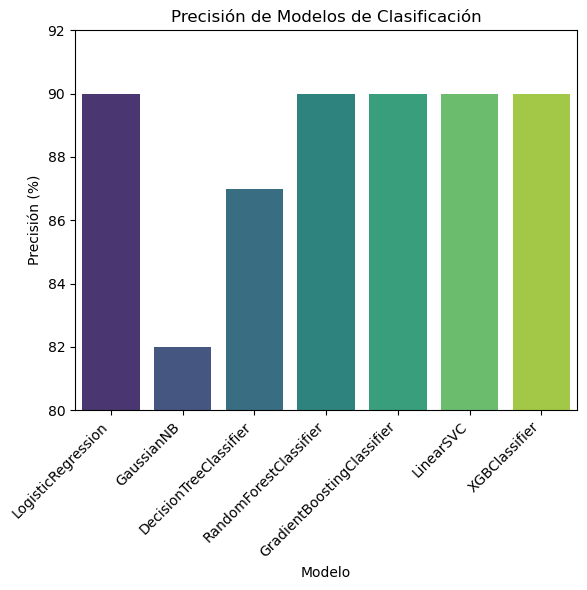

In [19]:
# Crear un DataFrame con los modelos y sus precisiones
data = {
    "Modelo": [
        "LogisticRegression",
        "GaussianNB",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "LinearSVC",
        "XGBClassifier"
    ],
    "Precisión (%)": [90.0, 82.0, 87.0, 90.0, 90.0, 90.0, 90.0]
}

df = pd.DataFrame(data)

# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Precisión de Modelos de Clasificación")
plt.ylim(80, 92)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## Stacking:

Debido a que la particion anterior sobre el 01-06-2018 está muy cerca en el borde de la bajada de precisión si se le suministra algo menos de datos a los modelos y actualmente se va a realizar cross-validation, se procede a coger una partición un poco más adelantada en el tiempo, en este caso se ha seleccionado el 01-09-2018.

In [4]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(date ='2018-09-01', features_to_keep=np.arange(0,36,1),class_labels=True)

Se realizará el modelo de stacking de forma que se asignará como meta-modelo la Regresión Logística. Esta decisión viene dada por la naturaleza de los datos que se intentan predecir, ya que es un caso de problema binario, en lo que los datos de salida con 0s o 1s según nuestro evento meteorlógico sea o no una tormenta

In [6]:
# Lista de modelos con nombres
model_list = [
    ('lr', LogisticRegression()),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svc', LinearSVC(dual=False)),
    ('xgb', xgb.XGBClassifier(eval_metric='mlogloss'))
]

# Crear y entrenar el modelo de stacking
meta_model = LogisticRegression()
stack_model = StackingClassifier(
    estimators=model_list,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict',  # importante para LinearSVC
    n_jobs=-1
)

print("Entrenando modelo de stacking...")
stack_model.fit(X_train, y_train)

# Evaluar
acc = stack_model.score(X_test, y_test)
print(f"Accuracy del modelo de stacking: {acc:.4f}")

Entrenando modelo de stacking...
Accuracy del modelo de stacking: 0.9078


Se recuerda antes, la precisión de los modelos originales:

In [7]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(date ='2018-09-01', features_to_keep=np.arange(0,36,1),class_labels=True)

In [8]:
import tqdm 

model_list = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),LinearSVC(dual=False),xgb.XGBClassifier(eval_metric='mlogloss')]

for model in tqdm.tqdm(model_list):
    model.fit(X_train,y_train)

for idx,model in enumerate(model_list):
    #Predicciones 
    yhat = model.predict(X_validate)
    
    #Metricas
    accuracy = accuracy_score(y_validate,yhat)
    
    print('{} accuracy: {}%'.format(model_list[idx],np.round(accuracy*100,2)))

  0%|          | 0/7 [00:00<?, ?it/s]c:\Users\EQUIPO\Documents\01-05-2025-kenny-stacking\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 7/7 [02:39<00:00, 22.76s/it]


LogisticRegression() accuracy: 89.6%
GaussianNB() accuracy: 82.16%
DecisionTreeClassifier() accuracy: 83.59%
RandomForestClassifier() accuracy: 90.28%
GradientBoostingClassifier() accuracy: 90.28%
LinearSVC(dual=False) accuracy: 89.92%
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel

De esta forma se puede ver, que al realizar stacking, la predicción de los modelos aumenta aunque sea de forma ínfima, esto es debido a que la precisión se encuentra en umbrales de precisión altos, entre el 83-90%

Si a esto se le añade los modelos ajustados, el modelo stacking final resulta en:

In [10]:
# Lista de modelos con nombres
# model_list = [
#     LogisticRegression(), 
#     GaussianNB(**{'var_smoothing': 1e-9}),
#     DecisionTreeClassifier(**{
#         'ccp_alpha': 0.001,
#         'criterion': 'entropy',
#         'max_depth': 6,
#         'max_features': 'sqrt'
#     }),
#     RandomForestClassifier(**{
#         'n_estimators': 95,
#         'min_samples_split': 8,
#         'min_samples_leaf': 2,
#         'max_features': 'sqrt',
#         'max_depth': 5,
#         'criterion': 'gini',
#         'bootstrap': True
#     }),
#     GradientBoostingClassifier(**{
#         'subsample': 1.0,
#         'n_estimators': 300,
#         'min_samples_split': 10,  # O 5, puedes elegir (pusiste dos opciones)
#         'max_depth': 3,
#         'learning_rate': 0.01
#     }),
#     LinearSVC(**{
#         'dual': False,
#         'C': 1000
#     }),
#     xgb.XGBClassifier(**{
#         'eval_metric': 'mlogloss',
#         'reg_lambda': 5,
#         'reg_alpha': 0.2,
#         'n_estimators': 600,
#         'min_child_weight': 10,  # o 15 o 25 (había 3 combinaciones, puedes elegir)
#         'max_depth': 20,  # o 10, o 20 (elige según quieras)
#         'learning_rate': 0.1,
#         'gamma': 3,  # o 1 o 2
#         'colsample_bytree': 1.0,  # o 0.9 o 0.8
#         'booster': 'gblinear'
#     })
# ]

model_list = [
    ('lr', LogisticRegression()), 
    ('gnb', GaussianNB(var_smoothing=1e-9)),
    ('dt', DecisionTreeClassifier(
        ccp_alpha=0.001,
        criterion='entropy',
        max_depth=6,
        max_features='sqrt'
    )),
    ('rf', RandomForestClassifier(
        n_estimators=95,
        min_samples_split=8,
        min_samples_leaf=2,
        max_features='sqrt',
        max_depth=5,
        criterion='gini',
        bootstrap=True
    )),
    ('gb', GradientBoostingClassifier(
        subsample=1.0,
        n_estimators=300,
        min_samples_split=10,
        max_depth=3,
        learning_rate=0.01
    )),
    ('svc', LinearSVC(
        dual=False,
        C=1000
    )),
    ('xgb', xgb.XGBClassifier(
        eval_metric='mlogloss',
        reg_lambda=5,
        reg_alpha=0.2,
        n_estimators=600,
        min_child_weight=10,
        max_depth=20,
        learning_rate=0.1,
        gamma=3,
        colsample_bytree=1.0,
        booster='gblinear'
    ))
]



# Crear y entrenar el modelo de stacking
meta_model = LogisticRegression()
stack_model = StackingClassifier(
    estimators=model_list,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict',  # importante para modelos como LinearSVC
    n_jobs=-1
)

print("Entrenando modelo de stacking...")
stack_model.fit(X_train, y_train)

# Evaluar
acc = stack_model.score(X_test, y_test)
print(f"Accuracy del modelo de stacking: {acc:.4f}")

Entrenando modelo de stacking...
Accuracy del modelo de stacking: 0.9075


C:\Users\Usuario\AppData\Local\Temp\ipykernel_23860\4254659376.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="viridis")


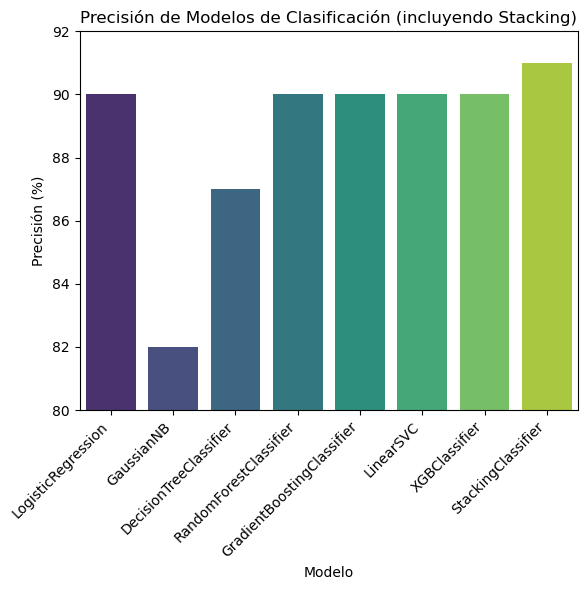

In [23]:
# Datos actualizados incluyendo el modelo de stacking redondeado
data = {
    "Modelo": [
        "LogisticRegression",
        "GaussianNB",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "LinearSVC",
        "XGBClassifier",
        "StackingClassifier"
    ],
    "Precisión (%)": [90.0, 82.0, 87.0, 90.0, 90.0, 90.0, 90.0, 91.0]
}

df = pd.DataFrame(data)

# Crear la gráfica
plt.figure(figsize=(6, 6))
sns.barplot(x="Modelo", y="Precisión (%)", data=df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Precisión de Modelos de Clasificación (incluyendo Stacking)")
plt.ylim(80, 92)
plt.tight_layout()
plt.show()


## Grafica Comparativa Articulo vs Propia

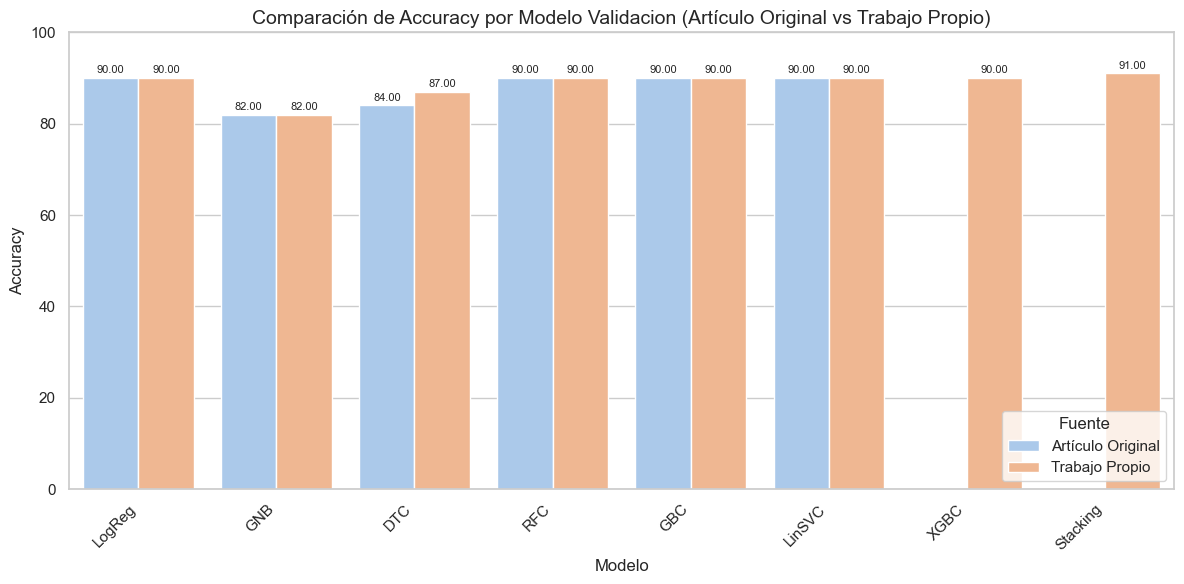

In [18]:
# Datos del paper original
datos_original = {
    'Modelo': ['LogReg', 'GNB', 'DTC', 'RFC', 'GBC', 'LinSVC'],
    'Accuracy': [90.0, 82.0, 84.0, 90.0, 90.0, 90.0],
    'Fuente': ['Artículo Original'] * 6
}

# Datos del trabajo propio
datos_trabajo = {
    'Modelo': ['LogReg', 'GNB', 'DTC', 'RFC', 'GBC', 'LinSVC', 'XGBC', 'Stacking'],
    'Accuracy': [90.0, 82.0, 87.0, 90.0, 90.0, 90.0, 90.0, 91.0],
    'Fuente': ['Trabajo Propio'] * 8
}

# Crear DataFrames y combinar
df_original = pd.DataFrame(datos_original)
df_trabajo = pd.DataFrame(datos_trabajo)
df = pd.concat([df_original, df_trabajo], ignore_index=True)

# Estilo
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Crear gráfico
ax = sns.barplot(data=df, x='Modelo', y='Accuracy', hue='Fuente', palette='pastel')

# Etiquetas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

# Ajustes de estilo
plt.title('Comparación de Accuracy por Modelo Validacion (Artículo Original vs Trabajo Propio)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
